In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import tkinter as tk
from scipy import stats
import plotly.plotly as py            #using package to draw pie chart which was not discussed in class
import plotly.graph_objs as go        #using package to add style to the pie chart which was not discussed in class
from statsmodels.formula.api import ols

import FPFunctions_AyanSarkar as func     #Calling the script which has reusable functions
 
import os

#Asking the users for the file details
filepath=input("Enter the path the files are placed on: ")
os.chdir(filepath)

#Reading the input files about Hoise Sales in Denver Area
HouseSalesData = pd.read_excel('HouseSales.xlsx')


Enter the path the files are placed on: C:\\Users\\ayans\\Documents


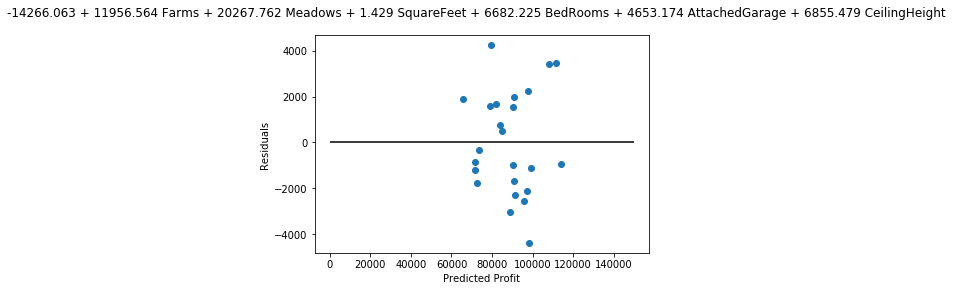

''

In [38]:


#Asking the user their choices for data exploration

root2 = tk.Tk()
root2.title('House Sales Data Analysis')
root2.geometry('700x300+400+250') 
v = tk.IntVar()
v.set(0)  # initializing the choice, i.e. 

menuchoices = [
    "View first 5 lines of the Input Data",
    "Average Square feet for the number of Bed rooms in the property",
    "Average Celing Height for the number of Bed rooms in the property",
    "Number of Farms, Meadows & Attached Garages for the number of Bed rooms in the property",
    "Correlation between Property Square Feet and the profit of a sale",
    "Compare Profits for Sales of properties having bedroom numbers of 4 and 5",
    "Compare Profits for Sales of properties for every number of bedroom options",
    "View Summary for the Regression analysis of Profit in House Sales",
    "View Prediction Plot for the Regression analysis of Profit in House Sales",
    "View Residual Plot for the Regression analysis of Profit in House Sales"
]
  
def Results(HouseSalesData):
    rval=''
    if v.get() == 0:
        #Displaying first 5 lines of the Data set
        rval=HouseSalesData.head() 
        
    elif v.get() == 1:
        #Calling function to plot a bar graph for Average Square feet for all the bedroom sizes
        func.Bargraph('Average Property Square feet for all the bedroom sizes',HouseSalesData['BedRooms'].unique(),
         HouseSalesData['SquareFeet'].groupby(HouseSalesData['BedRooms']).mean(),
         'Average Property Square Feet',
         'Number of bedrooms','Option0.png','blue')
        output=tk.Tk()
        output.title('Average Property Square feet for all the bedroom sizes')
        bargraph1= tk.PhotoImage(file=f'Option0.png')
        tk.Label(output,image=bargraph1).pack(side="left")
        output.geometry('600x450+400+250')
        output.mainloop()
        
    elif v.get() == 2:
        #Calling function to plot a bar graph for Property Celing Height for all the bedroom sizes
        func.Bargraph('Average Property Celing Height for all the bedroom sizes',HouseSalesData['BedRooms'].unique(),
         HouseSalesData['CeilingHeight'].groupby(HouseSalesData['BedRooms']).mean(),
         'Average Property Celing Height (in feet)',
         'Number of bedrooms','Option1.png','orange')
        output=tk.Tk()
        output.title('Average Property Celing Height for all the bedroom sizes')
        bargraph2= tk.PhotoImage(file=f'Option1.png')
        tk.Label(output,image=bargraph2).pack(side="left")
        output.geometry('600x450+400+250')
        output.mainloop()        

    elif v.get() == 3:
        #Calling function to plot a dynamic pie chart for Number of Farms, Meadows and Attached Garages for all the bedroom sizes
        rval= func.Piechart('Number of Farms, Meadows and Attached Garages for all Bed room sizes.',
                            ['2 Bed rooms','3 Bed rooms','4 Bed rooms','5 Bed rooms'],
                            np.array(HouseSalesData[['Farms']].groupby(HouseSalesData['BedRooms']).sum()),
                            'Farms',
                            np.array(HouseSalesData[['Meadows']].groupby(HouseSalesData['BedRooms']).sum()),
                            'Meadows',
                            np.array(HouseSalesData[['AttachedGarage']].groupby(HouseSalesData['BedRooms']).sum()),
                            'Attached Garage'
                           )
        
    elif v.get() == 4:
        # Calling a funciton to find correlation between Property Square Feet and the profit of a sale
        func.ScatterPlot('Property Square Feet and Profit from a Sale have a correlation of ',
                 HouseSalesData['SquareFeet'],
                 HouseSalesData['Profit'],
                 'Option3.png','blue')
        output=tk.Tk()
        output.title('Correlation between Property Square Feet and the profit of a sale')
        scplot= tk.PhotoImage(file=f'Option3.png')
        tk.Label(output,image=scplot).pack(side="left")
        output.geometry('600x450+400+250')
        output.mainloop() 
        
    elif v.get() == 5:
        # Calling a function to perform t-Test for Equal Variances
        func.tTestEqlVar(HouseSalesData[HouseSalesData['BedRooms']==4].Profit,
            HouseSalesData[HouseSalesData['BedRooms']==5].Profit,
            "This is a test of equal variances with Ho: The variances in Profit of properties having bedroom numbers of 4 and 5 are equal",
            "Conclusion: Reject Ho: The variances in Profit of properties having bedroom sizes of 4 and 5 are not equal",
            "Conclusion: Fail to Reject Ho: We can't reject that the variances in "+ 
              "Profit of properties having bedroom numbers of 4 and 5are the same",
            "Profit",
            'Option4.png'
            )

    elif v.get() == 6: 
        # Calling a function to perform Anova-Test
        func.AnovaTest(HouseSalesData[HouseSalesData['BedRooms']==2].Profit,
               HouseSalesData[HouseSalesData['BedRooms']==3].Profit,
               HouseSalesData[HouseSalesData['BedRooms']==4].Profit,
               HouseSalesData[HouseSalesData['BedRooms']==5].Profit,
               "This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different",
               'Profit averages differ among the different bedroom numbers.',
               'Profit',
               'Option5.png')
        
    elif v.get() == 7: 
        #Regression Summary Output
        model = ols("Profit ~ Farms + Meadows + SquareFeet + BedRooms + AttachedGarage + CeilingHeight",data=HouseSalesData).fit()
        print(model.summary()) # Print the results
        
    elif v.get() == 8: 
        model = ols("Profit ~ Farms + Meadows + SquareFeet + BedRooms + AttachedGarage + CeilingHeight",data=HouseSalesData).fit()
        ydata=HouseSalesData['Profit']
        #Regression - Prediction plot
        func.my_multreg(model,ydata,'Profit','Predicted Profit',0,150000,True,False)
        
    else:
        #Regression - Residual plot
        model = ols("Profit ~ Farms + Meadows + SquareFeet + BedRooms + AttachedGarage + CeilingHeight",data=HouseSalesData).fit()
        ydata=HouseSalesData['Profit']
        func.my_multreg(model,ydata,'Profit','Predicted Profit',0,150000,False,True)
        
    return rval
        
            
tk.Label(root2, 
         text="""Choose your Data exploration options:""",
         justify = tk.LEFT,
         padx = 20).pack()

for val, choice in enumerate(menuchoices):
    tk.Radiobutton(root2, 
                  text=choice,
                  variable=v, 
                  value=val).pack(anchor=tk.W)

button2 = tk.Button(root2, text='OK', width=25, command=root2.destroy) #
button2.pack()


root2.mainloop()

  
Results(HouseSalesData)

# Presentation of my Project

## Code Highlights:

### 1. The input data in this project is based on House sales.
### 2. The Data set has 7 variables: Farms, Meadows,SquareFeet, BedRooms, AttachedGarage, CeilingHeight &      Profit.
### 3. Three Categorical Variables: Farms, Meadows, AttachedGarage
### 4. Four numerical Variables: SquareFeet, BedRooms, CeilingHeight & Profit.
### 5. I have provided 10 options for the user to explore the data.
### 6. I have explored the library: plotly to create a dynamic graph

## Project Experiences

### 1. The experince for working with the GUI functionality was interesting.
### 2. Also it was great fun to make dynamic graphs using plotly.